# Table of Contents

-[Question 1](#one)

In [1]:
import pandas as pd
import numpy as np


#visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()

plt.style.use('bmh')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

#machine learning libraries
import xgboost as xgb
import catboost as cb 
from sklearn.metrics import mean_squared_error

from matplotlib import patheffects

import os

#project modules
import src.wrangle as wr
import src.summaries as su
import src.explore as ex

%config InlineBackend.figure_format = 'retina'
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from importlib import reload

import warnings
warnings.filterwarnings('ignore')

# one

-[return to TOC](#Table-of-Contents)

- We know that the covid-19 global pandemic altered business in the United States among countries of the world. Certainly Cisco Systems' sales in the state of Texas would be effected somehow. I set out to see if there would be large anamolous activities around the year 2020. First, I found that there is an enormous jump in quantities of orders from customers. This jump occured on Janurary 2, 2020. Texas Health and Human Services Commission purchased 3,767,123 units of something and 865,822 unites of something else. What were the things purchased? We cannot say from this data but considering the first order had a price of  0.00186𝑝𝑒𝑟𝑢𝑛𝑖𝑡𝑎𝑛𝑑 0.00085 per unit, we speculate that it might be licenses for cisco connect, Cisco System's VPN service.

- We found that a large purchase order like this is made for Texas Health and Human Services periodically, but the purchase is limited to around 1 million somethings. This purchase probably had to do with foresight regarding what could come given the brewing pandemic which was being reported in China.

- You may follow the following graphs to see the findings

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261886 entries, 2018-01-02 to 2022-11-29
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_name    261886 non-null  object 
 1   customer_type    261886 non-null  object 
 2   customer_city    261886 non-null  object 
 3   reseller_name    261886 non-null  object 
 4   reseller_city    261403 non-null  object 
 5   customer_zip     261886 non-null  int8   
 6   order_quantity   261886 non-null  int16  
 7   unit_price       261886 non-null  float64
 8   po_number        261883 non-null  object 
 9   year             261886 non-null  int64  
 10  quarter          261886 non-null  int64  
 11  month_name       261886 non-null  object 
 12  day_name         261886 non-null  object 
 13  month            261886 non-null  int64  
 14  week             261886 non-null  int64  
 15  day_of_week      261886 non-null  int64  
 16  day_of_year      26188

In [34]:
def clean_df():
    df = wr.get_clean_data(start2018=True)
    df = df.drop(columns = ['shipped_date', 'order_date_copy'])
    df['purchase_amount'] = df['purchase_amount'].astype('int64')
    df['customer_zip'] = df['customer_zip'].astype('int8')
    df['order_quantity'] = df['order_quantity'].astype('int64')
    df['unit_price'] = df['unit_price'].astype('float64')
    
    return df

In [35]:
df = clean_df()

### Notice the large order quantity outlier

<AxesSubplot:xlabel='Order Quantity'>

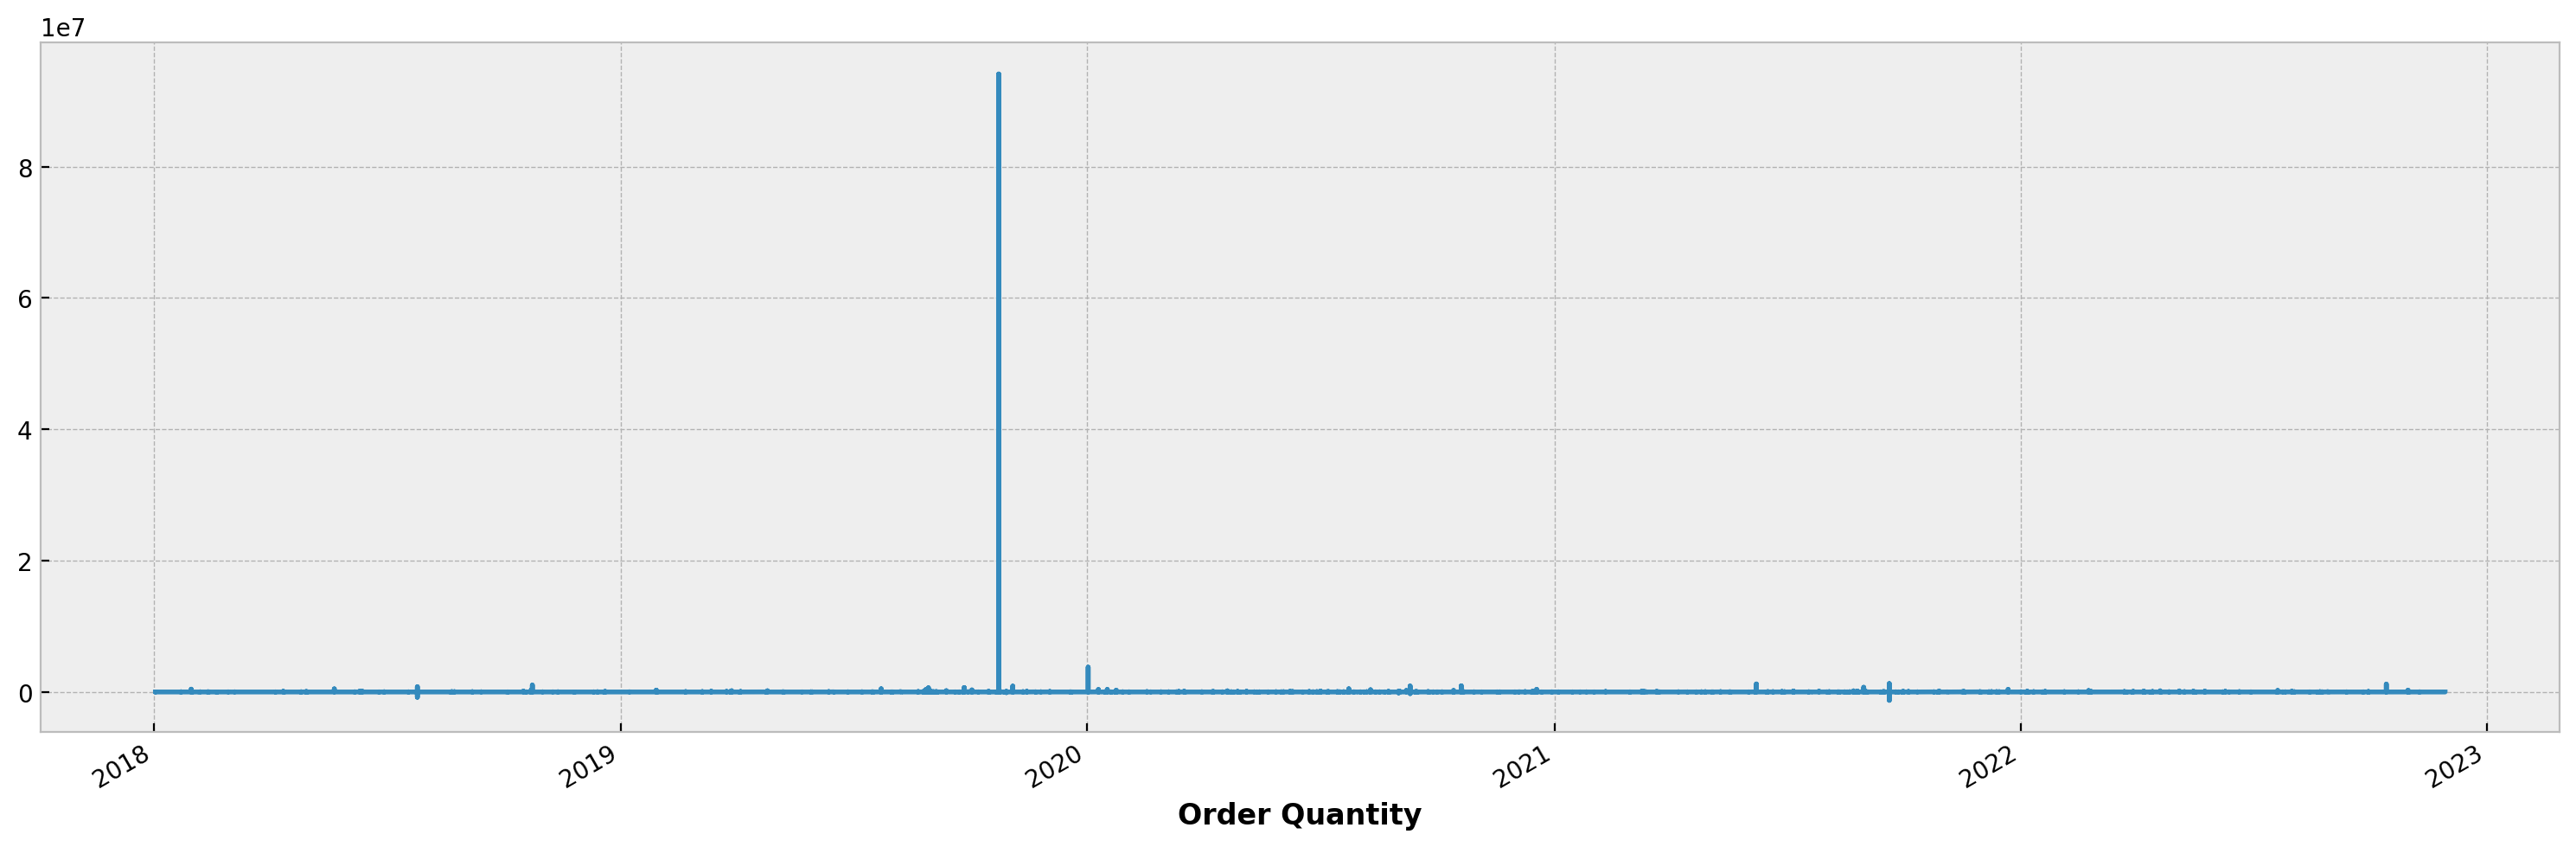

In [36]:
fix, ax = plt.subplots(figsize = (15,5))
df['order_quantity'].plot(ax=ax, xlabel='Order Quantity')

### Isolating the pandemic year

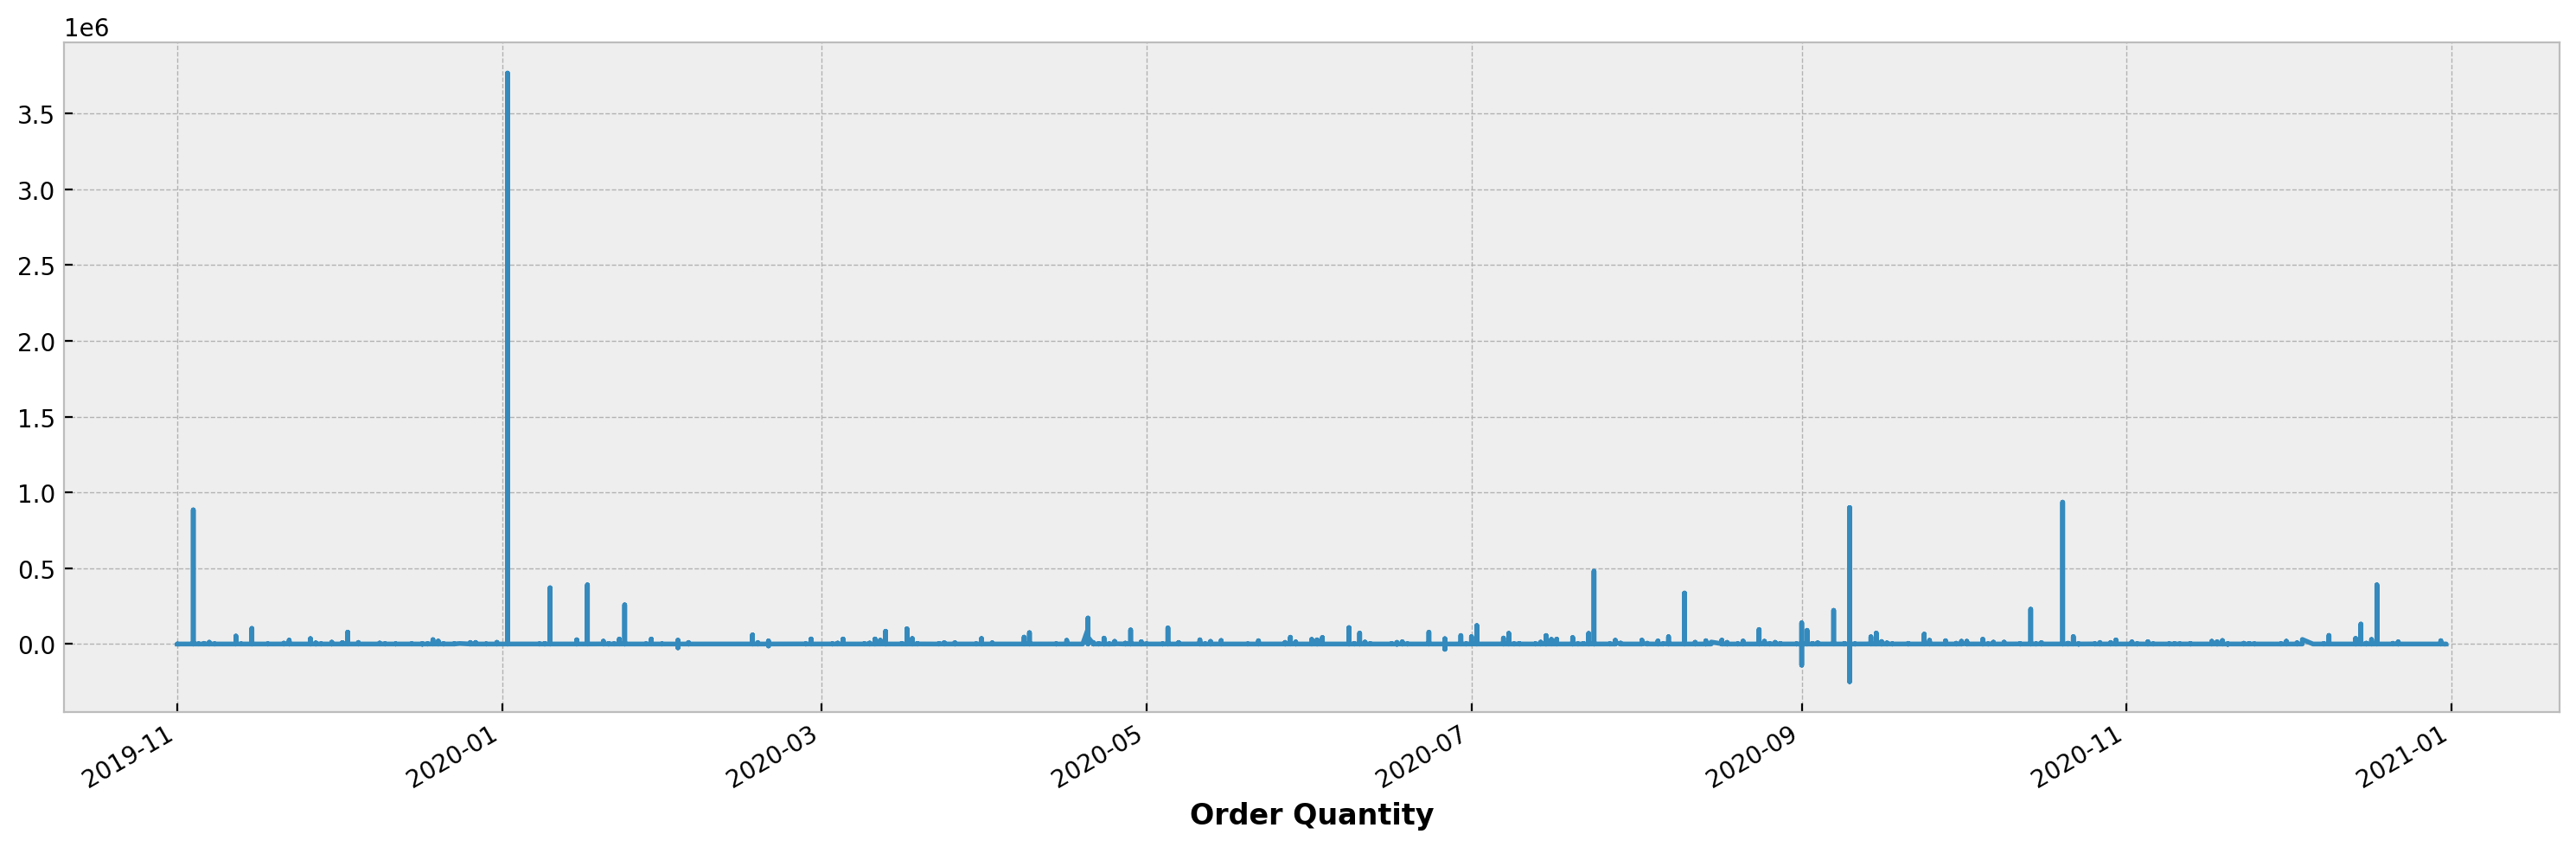

In [42]:
pandemic_df = df.loc[df.index >= '11-01-2019']
pandemic_df = pandemic_df.loc[pandemic_df.index < '01-01-2021']


fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)-
pandemic_df['order_quantity'].plot(ax=ax, xlabel='Order Quantity')
plt.show()

### Taking a peek at who the big buyers were on that anomolous day

<BarContainer object of 6 artists>

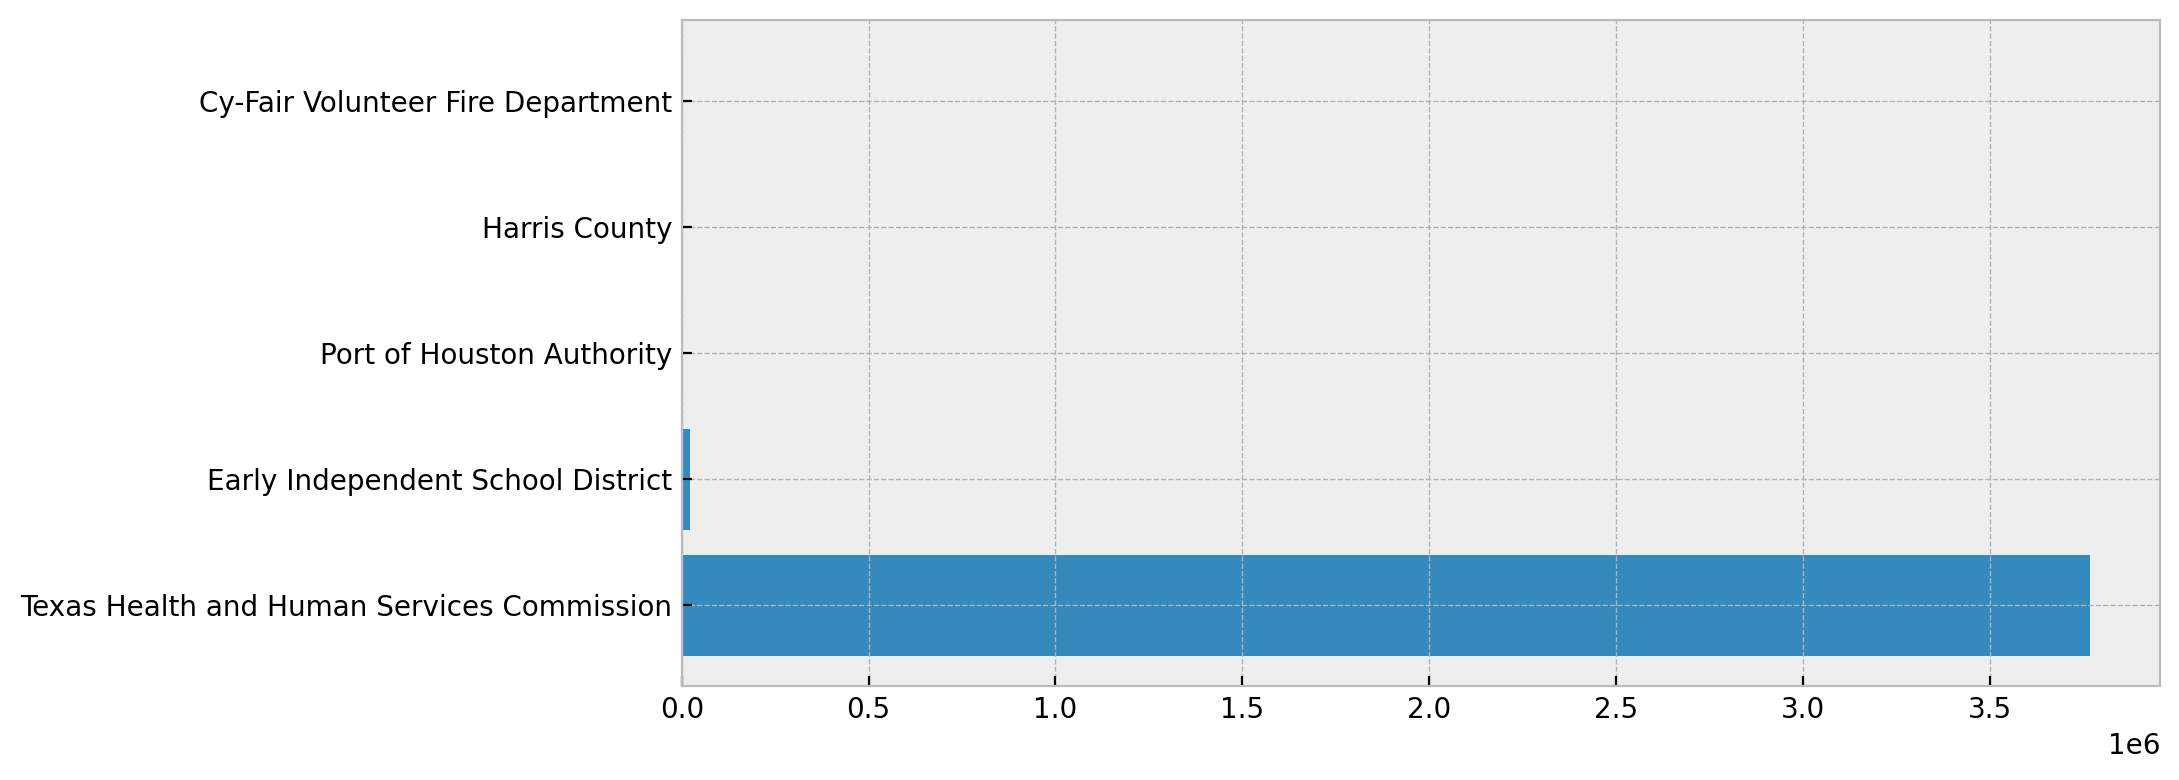

In [44]:
jan2 = pandemic_df.loc[pandemic_df.index == '01-02-2020']
jan2purchases = jan2.sort_values(by=['order_quantity'], ascending = False).head(6)
fig, ax = plt.subplots()
ax.barh(jan2purchases.customer_name, jan2purchases.order_quantity)

## We can see that Texas Health and Human Services Commission Purc

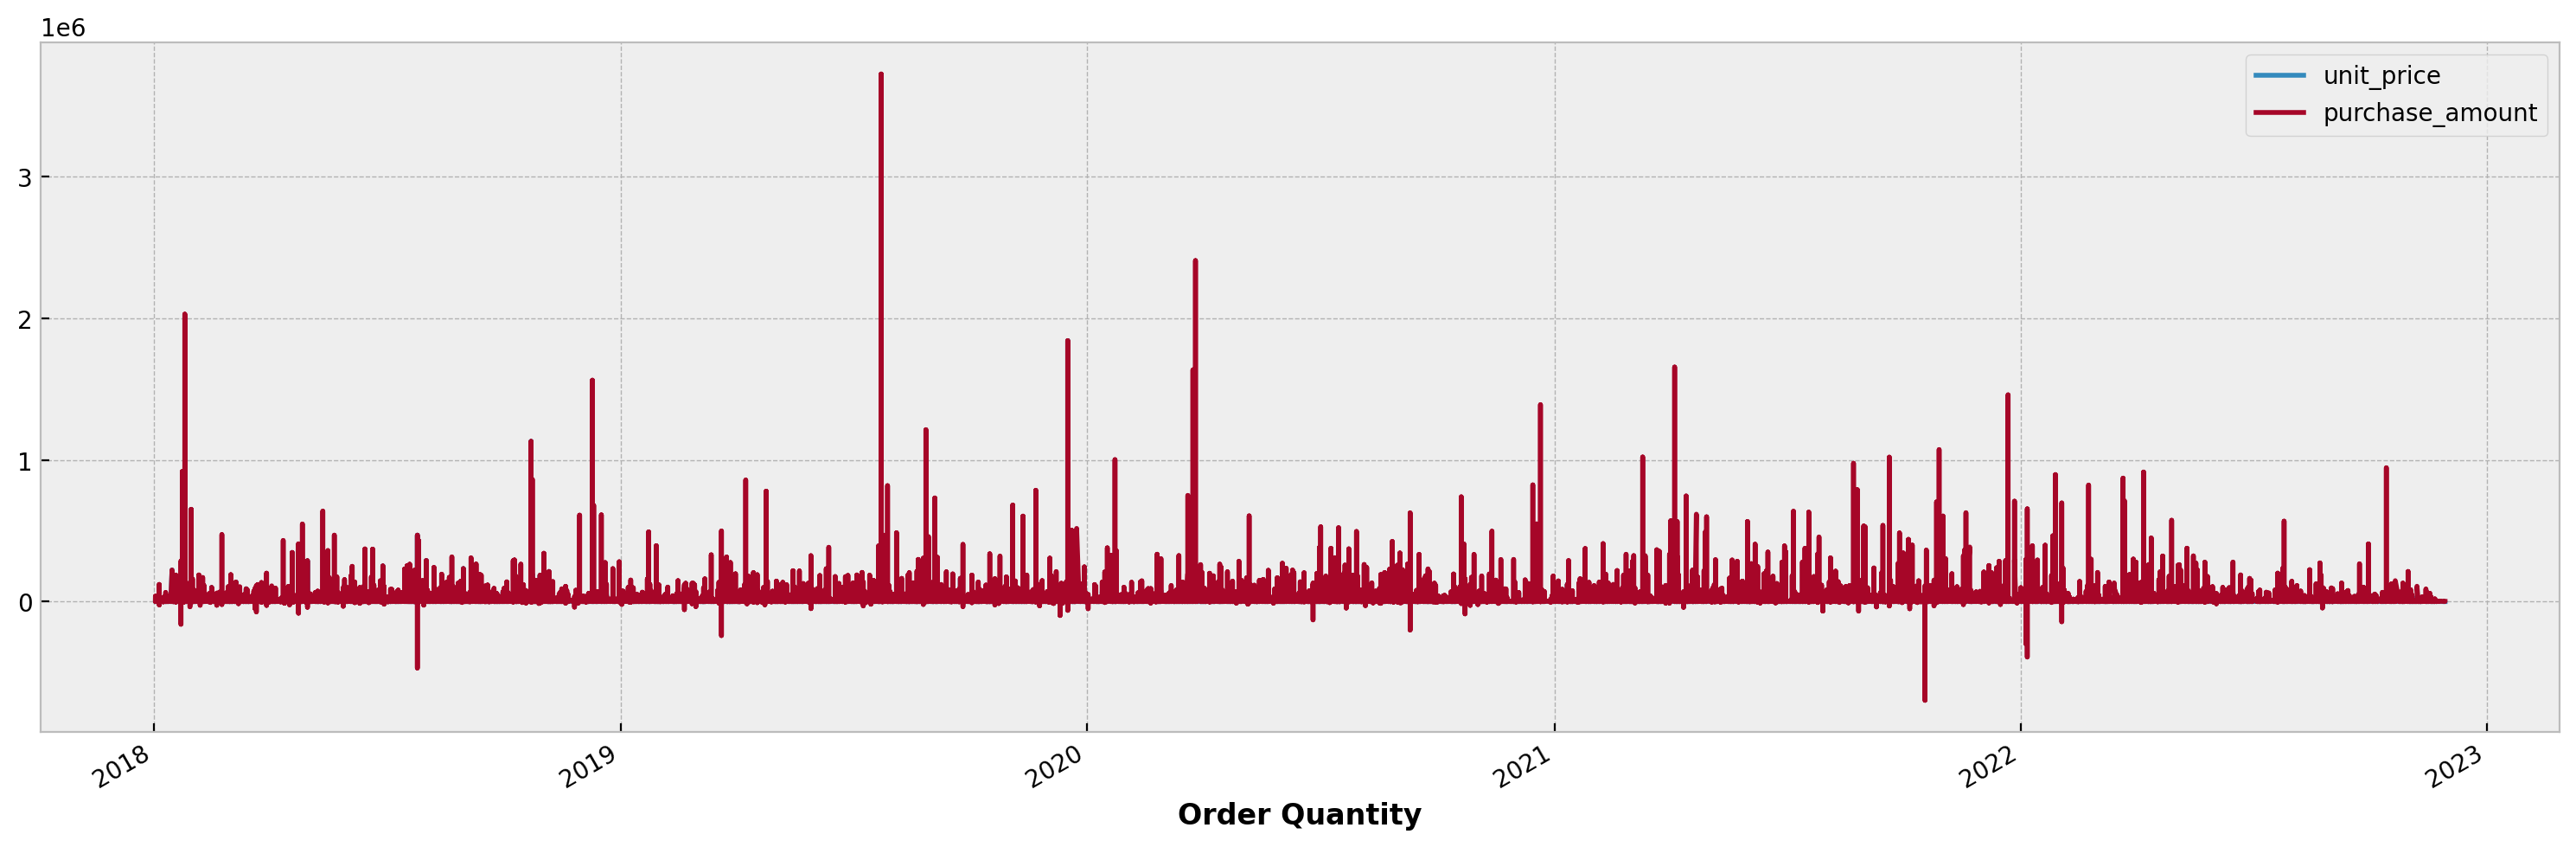

In [40]:
pandemic_df = df.loc[df.index >= '11-01-2019']
pandemic_df = pandemic_df.loc[pandemic_df.index < '01-01-2021']
#pandemic_df = df.drop(columns = ['order_quantity', 'customer_zip', 'year', 'quarter', 'month', 'week', 'day_of_week', 'day_of_year'])

fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)-
pandemic_df.plot(ax=ax, xlabel='Order Quantity')
plt.show()

<AxesSubplot:xlabel='Unit Price'>

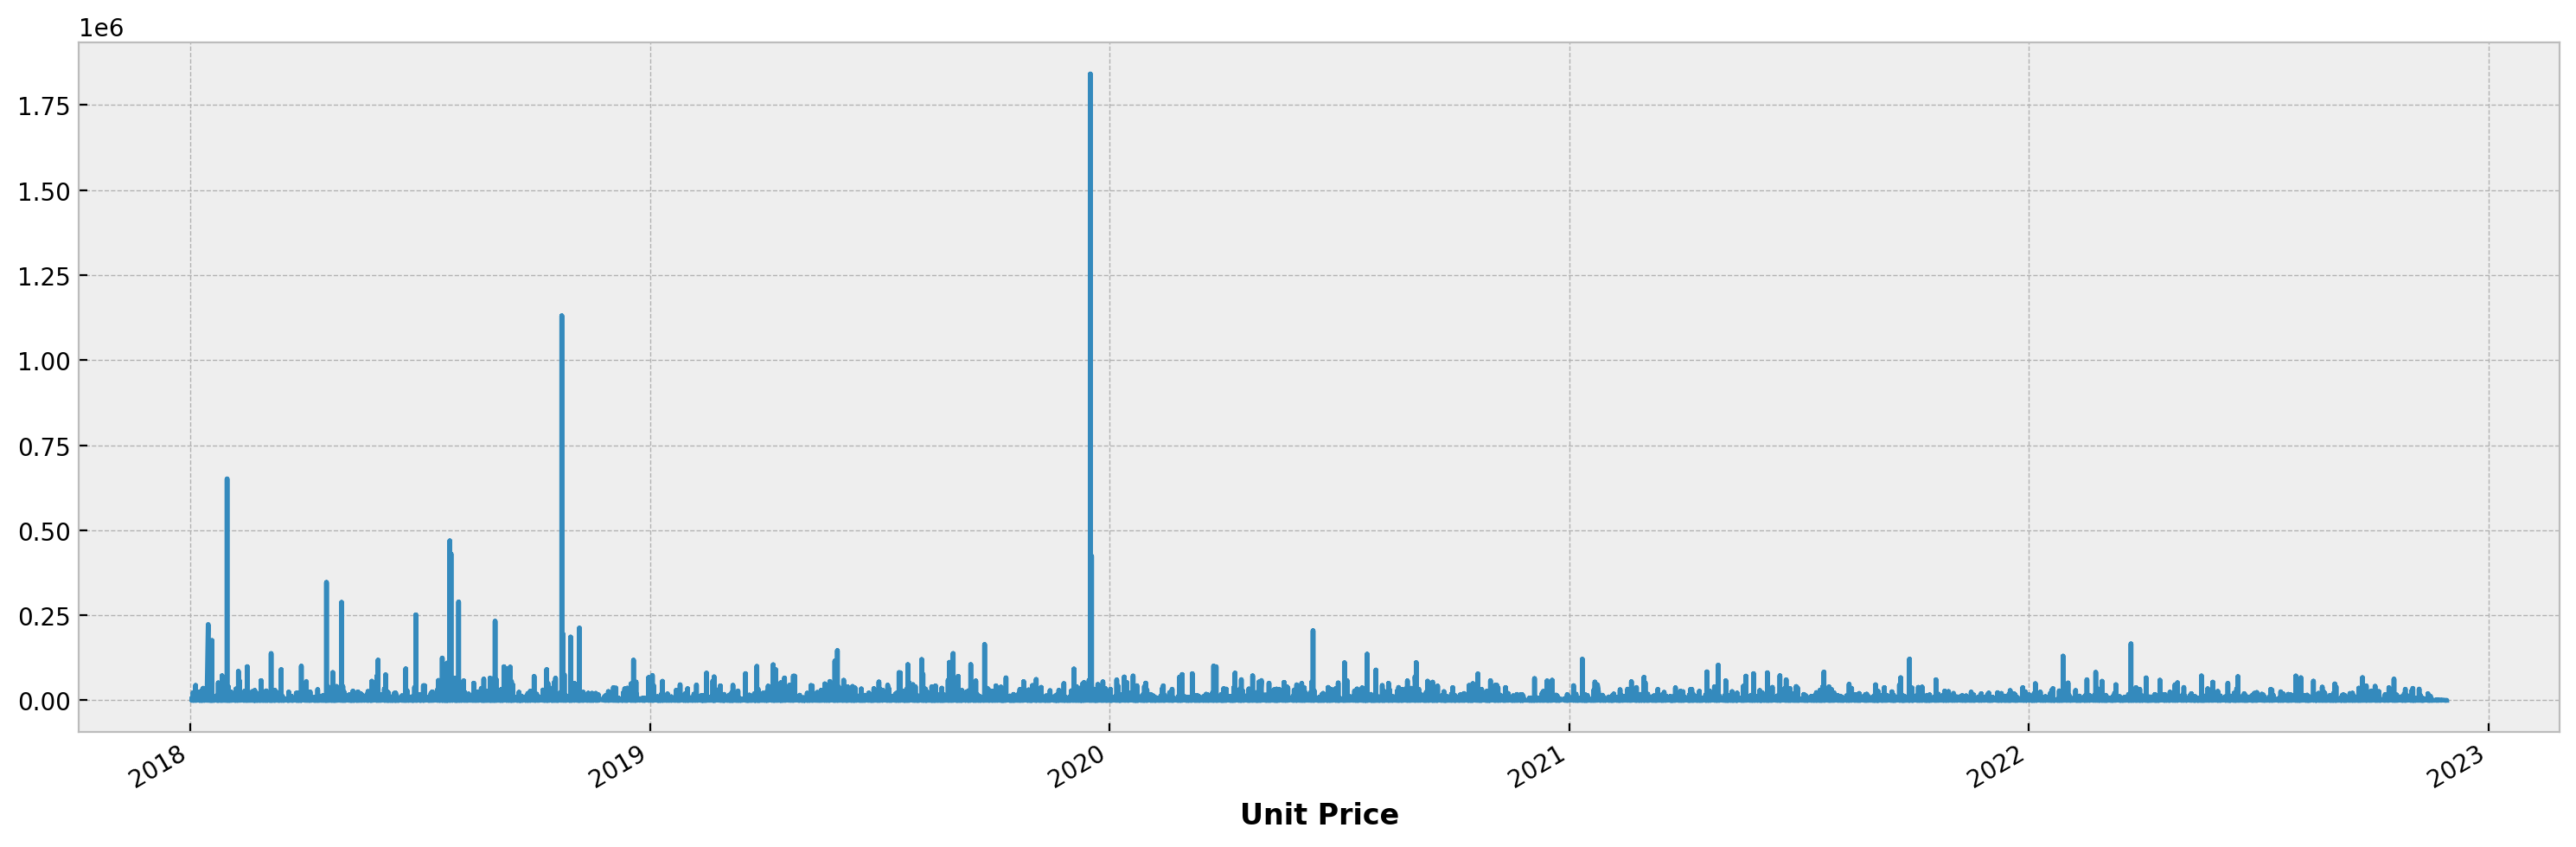

In [11]:
fix, ax = plt.subplots(figsize = (15,5))
df['unit_price'].plot(ax=ax, xlabel='Unit Price')